In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("titanic.csv")

In [37]:
df.head()

df = df.dropna(subset=['age'])
fr = df["survived"].mean()
print(len(df[df["survived"] ==1 ]))


427


In [29]:
df[df["age"] > 70]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,B,NaN,"Hessle, Yorks"
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S,6,NaN,"Little Onn Hall, Staffs"
135,1,0,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,NaN,NaN,"New York, NY"
727,3,0,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,NaN,171.0,NaN
1235,3,0,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,NaN,NaN,NaN


<AxesSubplot:xlabel='age,sex'>

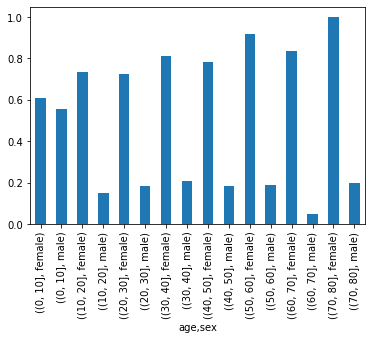

In [30]:
df.groupby([pd.cut(df["age"], np.arange(0, 81,10)), "sex"])["survived"].mean().T.plot(kind="bar")

In [7]:
plot(kind="bar")

NameError: name 'plot' is not defined

In [ ]:

coin.T.plot.bar()
plt.show()

In [ ]:
df[df["age"] <= 10]["survived"]

In [ ]:
df[(df["age"] <= 10) & (df["survived"]  == 1)]["survived"].count()

In [42]:
male_df = df[df["sex"] == "male"]#.groupby(pd.cut(df["age"], np.arange(0, 81,10)))["survived"].mean()
print(male_df)

      pclass  survived                                  name   sex      age  \
1          1         1        Allison, Master. Hudson Trevor  male   0.9167   
3          1         0  Allison, Mr. Hudson Joshua Creighton  male  30.0000   
5          1         1                   Anderson, Mr. Harry  male  48.0000   
7          1         0                Andrews, Mr. Thomas Jr  male  39.0000   
9          1         0               Artagaveytia, Mr. Ramon  male  71.0000   
...      ...       ...                                   ...   ...      ...   
1299       3         0                   Yasbeck, Mr. Antoni  male  27.0000   
1301       3         0                  Youseff, Mr. Gerious  male  45.5000   
1306       3         0             Zakarian, Mr. Mapriededer  male  26.5000   
1307       3         0                   Zakarian, Mr. Ortin  male  27.0000   
1308       3         0                    Zimmerman, Mr. Leo  male  29.0000   

      sibsp  parch    ticket      fare    cabin emb

In [45]:
df["survived"].mean()

0.40822179732313574

In [46]:
df.groupby("sex")["survived"].mean()

sex
female    0.752577
male      0.205167
Name: survived, dtype: float64

In [48]:
def test(column): return np.sum(column) / len(df) *100
df.groupby("sex")["survived"].agg(test)

sex
female    27.91587
male      12.90631
Name: survived, dtype: float64

In [44]:
def test(column): return np.sum(column) / len(df) *100

survied_age = df.groupby(pd.cut(df["age"], np.arange(0, 81,10)))["survived"].agg([np.mean,np.sum,pd.Series.count,test])
print(survied_age)

              mean  sum  count       test
age                                      
(0, 10]   0.581395   50     86   4.780115
(10, 20]  0.395062   64    162   6.118547
(20, 30]  0.371191  134    361  12.810707
(30, 40]  0.423810   89    210   8.508604
(40, 50]  0.393939   52    132   4.971319
(50, 60]  0.483871   30     62   2.868069
(60, 70]  0.222222    6     27   0.573614
(70, 80]  0.333333    2      6   0.191205


In [49]:
def test(column): return np.sum(column) / len(df) *100
mean_survived_male_df = male_df.groupby(pd.cut(male_df["age"], np.arange(0, 81,10)))["survived"].agg([np.mean,np.sum,test])
print(mean_survived_male_df)

              mean  sum      test
age                              
(0, 10]   0.555556   25  2.390057
(10, 20]  0.148936   14  1.338432
(20, 30]  0.182979   43  4.110899
(30, 40]  0.207407   28  2.676864
(40, 50]  0.186047   16  1.529637
(50, 60]  0.189189    7  0.669216
(60, 70]  0.047619    1  0.095602
(70, 80]  0.200000    1  0.095602


In [51]:
len(df[(df["survived"] == 1) & (df["sex"] == "male")])

135

          moyenne_partielle  moyenne_global
age                                        
(0, 10]           60.975610        2.390057
(10, 20]          73.529412        4.780115
(20, 30]          72.222222        8.699809
(30, 40]          81.333333        5.831740
(40, 50]          78.260870        3.441683
(50, 60]          92.000000        2.198853
(60, 70]          83.333333        0.478011
(70, 80]         100.000000        0.095602


<AxesSubplot:xlabel='age'>

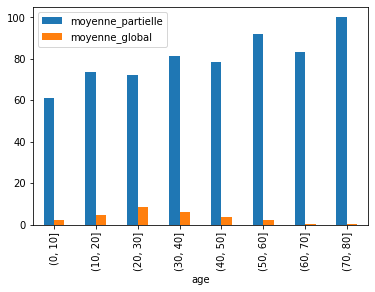

In [56]:
def moyenne_global(column): return np.sum(column) / len(df) *100
def moyenne_partielle(column): return np.mean(column)*100
female_df = df[df["sex"] == "female"]
mean_survived_female_df = female_df.groupby(pd.cut(female_df["age"], np.arange(0, 81,10)))["survived"].agg([moyenne_partielle,moyenne_global])
print(mean_survived_female_df)
mean_survived_female_df.plot(kind="bar")

In [ ]:
ax = mean_survived_male_df.plot(kind="bar")


mean_survived_female_df.plot(ax=ax, kind="bar", alpha=0.5)
plt.legend(["Male","Female"])
plt.ylabel("% of survivors")



In [ ]:
classd = df.groupby(["pclass","sex"])["survived"].agg([np.mean])

In [ ]:
print(classd)

In [69]:
len(df[(df["sex"] == "female")&(df["pclass"] == 1)])

133

        percent_survie_groupe  proportion_parmis_la_pop  \
pclass                                                    
1                   63.732394                 17.304015   
2                   44.061303                 10.994264   
3                   26.147705                 12.523901   

        proportion_among_survivors         tt  
pclass                                         
1                        42.388759  27.151052  
2                        26.932084  24.952199  
3                        30.679157  47.896750  


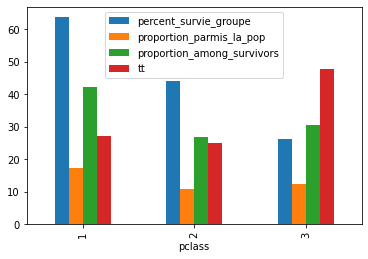

In [94]:
def proportion_parmis_la_pop(column): return np.sum(column) / len(df) *100
def percent_survie_groupe(column): return np.mean(column)*100
def proportion_among_survivors(column): return np.sum(column)/len(df[df["survived"] == 1]) *100
def tt(column): return np.size(column)/ len(df)*100
cl = df.groupby(["pclass"])["survived"].agg([percent_survie_groupe,proportion_parmis_la_pop, proportion_among_survivors ,tt])
cl.plot(kind="bar")
print(cl)

63% des gens de 1ère classe ont survécu || il représente 17% de la population à bord du bateau ||  42% des survivants étaient issues de cette classe

In [84]:
len(df[(df["pclass"] ==1)&(df["survived"]  == 1)])


181

In [54]:
df_sib = df.groupby(["pclass", "sibsp"])["survived"].agg([np.mean])#, pd.Series.count])
print(df_sib)

                  mean
pclass sibsp          
1      0      0.593939
       1      0.682243
       2      0.875000
       3      0.750000
2      0      0.391566
       1      0.524390
       2      0.500000
       3      1.000000
3      0      0.259887
       1      0.340659
       2      0.187500
       3      0.181818
       4      0.136364
       5      0.000000
       8      0.000000


In [ ]:
df_sib.plot(kind="bar")

In [ ]:
df["sex"].value_counts(normalize=True)

In [ ]:
df["sex"].value_counts()

In [ ]:
df[df["sex"] == "male"]["survived"].value_counts()

In [ ]:
df["survived"].mean()

In [ ]:
df[df["sex"] == "female"]["survived"].value_counts()

In [ ]:
def nt(column): return np.sum(column) / 1309
df.groupby("sex")["survived"].agg(nt)

In [ ]:
df["survived"].mean()

In [ ]:
df[(df["sex"] == "male") & (df["survived"] == 1 )]["survived"].value_counts() /len(df)